# Prediction of startup is fail or sucess

## Objective
The objective of the project is to predict whether a startup which is currently operating turn into a success or a failure. The success of a company is defined as the event that gives the company's founders a large sum of money through the process of M&A (Merger and Acquisition) or an IPO (Initial Public Offering). A company would be considered as failed if it had to be shutdown.

#### Prepare the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Load Data

In [2]:
df=pd.read_csv('big_startup_secsees_dataset.csv')
df=df.iloc[:,:-8]
df
            

/tmp/ipykernel_12669/3257739459.py:1: DtypeWarning: Columns (10,14,16,17,19,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('big_startup_secsees_dataset.csv')


,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66363,/organization/zznode-science-and-technology-co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,1587301,operating,CHN,22,Beijing,Beijing,1,NaN,2012-04-01,2012-04-01
66364,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,114304,operating,HRV,15,Split,Split,4,2012-05-13,2011-11-01,2014-03-01
66365,/organization/Áeron,ÁERON,http://www.aeron.hu/,NaN,-,operating,NaN,NaN,NaN,NaN,1,2011-01-01,2014-08-01,2014-08-01
66366,/organization/Ôasys-2,Ôasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,18192,operating,USA,CA,SF Bay Area,San Francisco,1,2014-01-01,2015-01-01,2015-01-01


#### Analaysing Data
The goal here is to find out more about data <br>
1.How big is the data <br>
2.How does the data look like <br>
3.What is the datatype of columns <br>
4.Are there any missing values <br>
5.Are there any duplicate values <br>


In [3]:
df.shape

(66368, 14)

In [4]:
df.head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24


In [5]:
df.tail()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
66363,/organization/zznode-science-and-technology-co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,1587301,operating,CHN,22,Beijing,Beijing,1,NaN,2012-04-01,2012-04-01
66364,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,114304,operating,HRV,15,Split,Split,4,2012-05-13,2011-11-01,2014-03-01
66365,/organization/Áeron,ÁERON,http://www.aeron.hu/,NaN,-,operating,NaN,NaN,NaN,NaN,1,2011-01-01,2014-08-01,2014-08-01
66366,/organization/Ôasys-2,Ôasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,18192,operating,USA,CA,SF Bay Area,San Francisco,1,2014-01-01,2015-01-01,2015-01-01
66367,/organization/İnovatiff-reklam-ve-tanıtım-hizm...,İnovatiff Reklam ve Tanıtım Hizmetleri Tic,http://inovatiff.com,Consumer Goods|E-Commerce|Internet,14851,operating,NaN,NaN,NaN,NaN,1,NaN,2013-10-01,2013-10-01


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   permalink          66368 non-null  object
 1   name               66367 non-null  object
 2   homepage_url       61310 non-null  object
 3   category_list      63220 non-null  object
 4   funding_total_usd  66368 non-null  object
 5   status             66368 non-null  object
 6   country_code       59410 non-null  object
 7   state_code         57821 non-null  object
 8   region             58338 non-null  object
 9   city               58340 non-null  object
 10  funding_rounds     66368 non-null  object
 11  founded_at         51148 non-null  object
 12  first_funding_at   66343 non-null  object
 13  last_funding_at    66368 non-null  object
dtypes: object(14)
memory usage: 7.1+ MB


In [7]:
df.isna().sum()

permalink                0
name                     1
homepage_url          5058
category_list         3148
funding_total_usd        0
status                   0
country_code          6958
state_code            8547
region                8030
city                  8028
funding_rounds           0
founded_at           15220
first_funding_at        25
last_funding_at          0
dtype: int64

In [8]:
df.duplicated().sum()

0

#### EDA

In [9]:
demo=df.copy()

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'operating'),
  Text(1, 0, 'acquired'),
  Text(2, 0, 'closed'),
  Text(3, 0, 'ipo'),
  Text(4, 0, ' http://www.dreamlines.com.au '),
  Text(5, 0, '1032'),
  Text(6, 0, '-'),
  Text(7, 0, '500000'),
  Text(8, 0, '160000')])

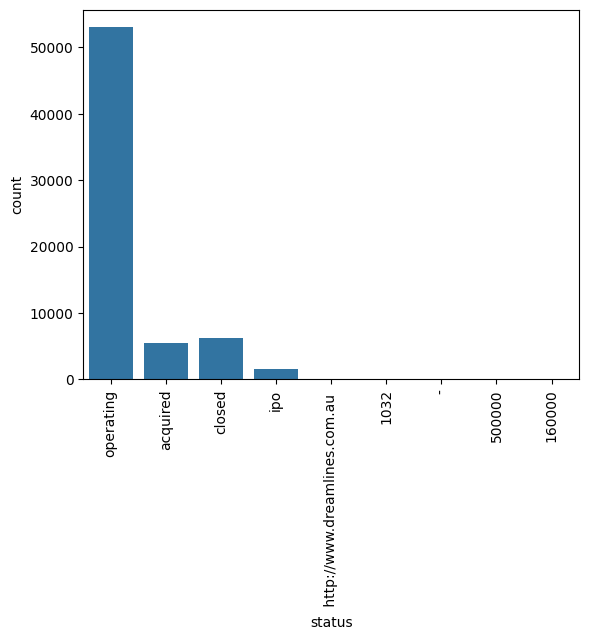

In [10]:
sns.countplot(x='status',data=demo)
plt.xticks(rotation=90)

The status column contains some erroneous values that were mistakenly included. These values need to be corrected or removed to ensure data consistency.

In [11]:
status = []

for i in demo['status']:
    if i in ['acquired','ipo']:
        status.append('success')
    elif i == 'closed':
        status.append('fail')
    else:
        status.append('operating')
        
demo['status_class'] = status
demo.drop(['status'],axis=1,inplace=True)

In the objective, success is defined as either an acquisition or an IPO. To reflect this, we will merge these two categories into a single category, clean the status column to remove any erroneous values, and then create a new column called status_class to represent the updated status of each

In [12]:
demo.status_class.value_counts()

status_class
operating    53034
success       7096
fail          6238
Name: count, dtype: int64

In [13]:
demo

,permalink,name,homepage_url,category_list,funding_total_usd,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,status_class
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05,operating
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14,operating
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30,operating
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19,operating
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24,operating
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66363,/organization/zznode-science-and-technology-co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,1587301,CHN,22,Beijing,Beijing,1,NaN,2012-04-01,2012-04-01,operating
66364,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,114304,HRV,15,Split,Split,4,2012-05-13,2011-11-01,2014-03-01,operating
66365,/organization/Áeron,ÁERON,http://www.aeron.hu/,NaN,-,NaN,NaN,NaN,NaN,1,2011-01-01,2014-08-01,2014-08-01,operating
66366,/organization/Ôasys-2,Ôasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,18192,USA,CA,SF Bay Area,San Francisco,1,2014-01-01,2015-01-01,2015-01-01,operating


<Axes: xlabel='status_class', ylabel='count'>

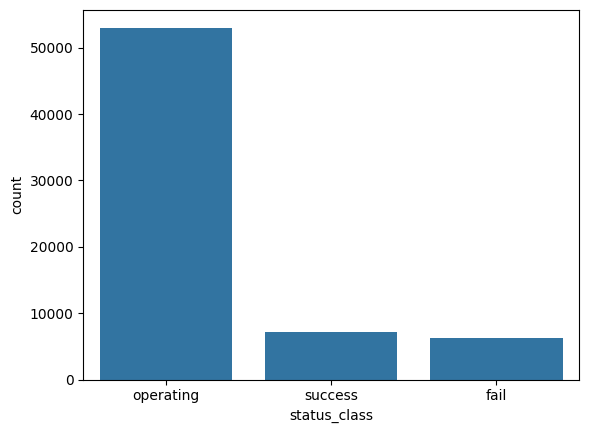

In [14]:
sns.countplot(x='status_class',data=demo)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Biotechnology'),
  Text(1, 0, 'Clean Technology'),
  Text(2, 0, 'Curated Web'),
  Text(3, 0, 'E-Commerce'),
  Text(4, 0, 'Enterprise Software'),
  Text(5, 0, 'Games'),
  Text(6, 0, 'Hardware + Software'),
  Text(7, 0, 'Health Care'),
  Text(8, 0, 'Mobile'),
  Text(9, 0, 'Software')])

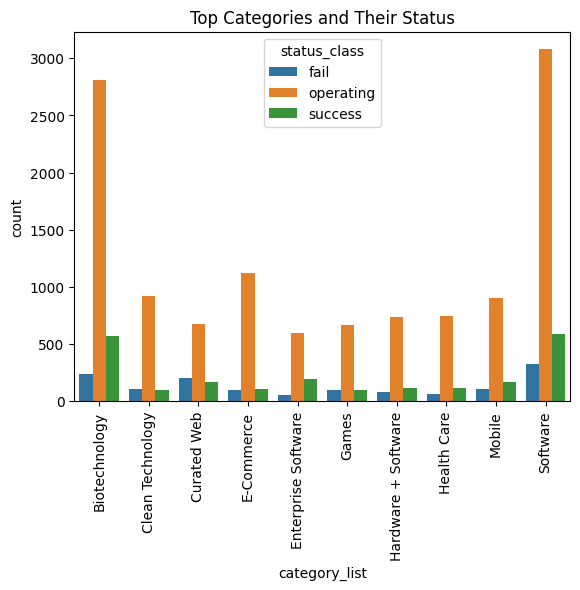

In [15]:

top_categories = demo['category_list'].value_counts().head(10).index
filtered_df = demo[demo['category_list'].isin(top_categories)]
grouped = filtered_df.groupby(['category_list', 'status_class']).size().reset_index(name='count')

sns.barplot(x='category_list', y='count', hue='status_class', data=grouped)
plt.title('Top Categories and Their Status')
plt.xticks(rotation=90)


The graph displays the status of the top 10 categories. It shows that the Software category has the highest number of operating startups, followed by the Biotechnology category.

In [16]:
demo['funding_total_usd'] = demo['funding_total_usd'].replace('-', '0')
demo['funding_total_usd'] = pd.to_numeric(demo['funding_total_usd'], errors='coerce')
mean_funding = demo['funding_total_usd'].mean()
demo['funding_total_usd'].replace(0, mean_funding, inplace=True)
demo['funding_total_usd'] = demo['funding_total_usd'].astype(float)

Clean the funding_total_usd column by replacing '-' with 0, then convert the column to a numerical type. Finally, replace any remaining zeros with the mean value.

Text(0.5, 1.0, 'Top 10 Countries by Total Funding and Status')

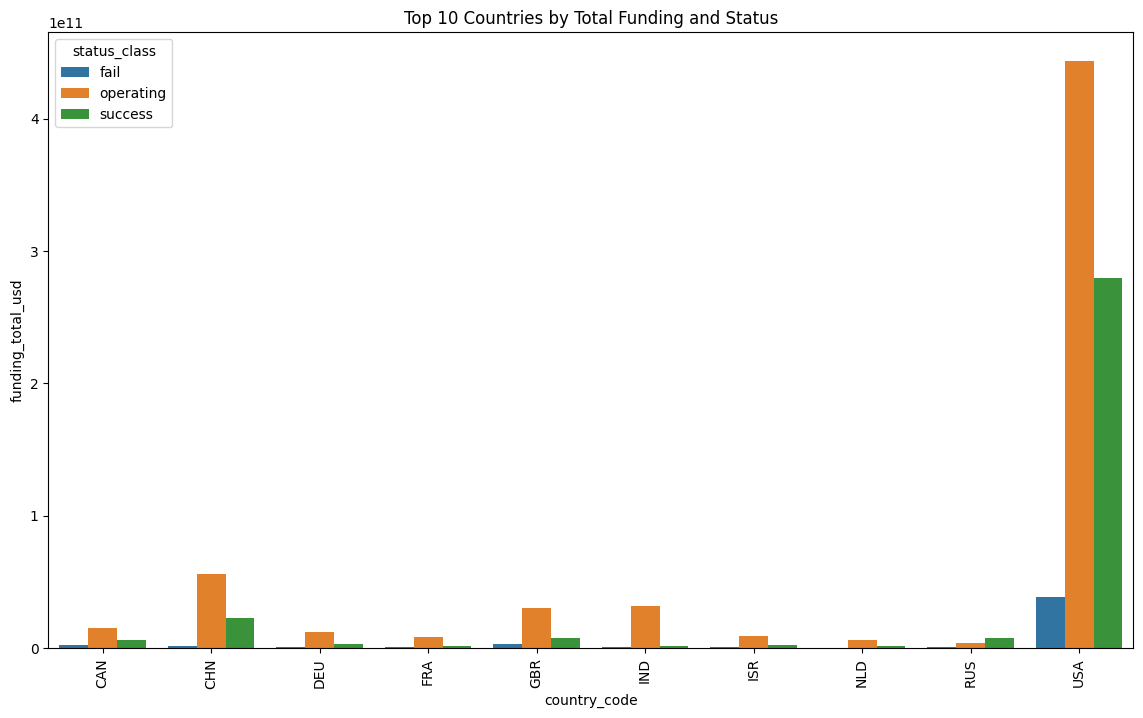

In [17]:
country_total_funding = demo.groupby(['status_class', 'country_code'])['funding_total_usd'].sum().reset_index()
country_total = country_total_funding.groupby('country_code')['funding_total_usd'].sum().reset_index()
top_50_countries = country_total.sort_values(by='funding_total_usd', ascending=False).head(10)['country_code']
top_50 = country_total_funding[country_total_funding['country_code'].isin(top_50_countries)]
plt.figure(figsize=(14, 8))
sns.barplot(x='country_code', y='funding_total_usd', data=top_50, hue='status_class')

plt.xticks(rotation=90)
plt.title('Top 10 Countries by Total Funding and Status')

This graph illustrates the total funding in USD for the top 10 countries, with a comparison of their statuses. The USA leads in funding compared to other countries.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Biotechnology'),
  Text(1, 0, 'Clean Technology'),
  Text(2, 0, 'Curated Web'),
  Text(3, 0, 'E-Commerce'),
  Text(4, 0, 'Enterprise Software'),
  Text(5, 0, 'Hardware + Software'),
  Text(6, 0, 'Health Care'),
  Text(7, 0, 'Health and Wellness'),
  Text(8, 0, 'Mobile'),
  Text(9, 0, 'Software')])

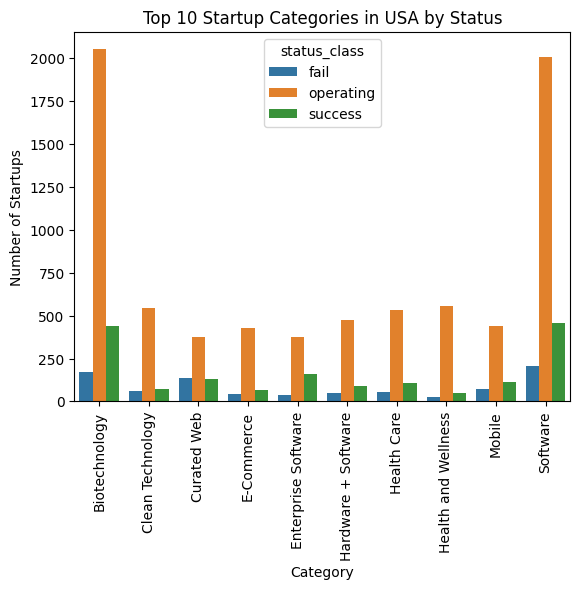

In [18]:
usa_startup=demo.loc[demo['country_code']=='USA']
top_categories_in_usa = usa_startup['category_list'].value_counts().head(10).index

# Filter the original dataframe to only include these top 5 categories
filtered_data = usa_startup[usa_startup['category_list'].isin(top_categories_in_usa)]

# Group the data by category and status
category_status_counts = filtered_data.groupby(['category_list', 'status_class']).size().reset_index(name='Number of Startups')

# Plot using seaborn with hue to show status
sns.barplot(x='category_list', y='Number of Startups', hue='status_class', data=category_status_counts)

# Add title and labels
plt.title('Top 10 Startup Categories in USA by Status')
plt.xlabel('Category')
plt.ylabel('Number of Startups')

# Rotate the x labels for better readability
plt.xticks(rotation=90)

This graph will display the startup categories in the USA and their performance across each category.

In [19]:
demo.funding_rounds.value_counts()

funding_rounds
1                                  41967
2                                  12189
3                                   5524
4                                   2699
5                                   1452
6                                    760
1                                    502
7                                    414
8                                    209
2                                    164
9                                    121
3                                     81
10                                    79
11                                    49
4                                     39
12                                    28
5                                     16
13                                    15
6                                     14
16                                     6
15                                     6
14                                     6
9                                      5
8                                      5
7

In [20]:
cleaned_funding_rounds=[]
for i in demo.funding_rounds:
    if len(str(i))<=2:
        cleaned_funding_rounds.append(int(i))
    else:
        cleaned_funding_rounds.append(int(1))
demo['funding_rounds']=cleaned_funding_rounds


The funding_rounds column contains some string values that could lead to misleading results. We will clean this column by replacing non-numeric values with the most frequently occurring value. This will ensure more accurate analysis moving forward.

In [21]:
demo['last_funding_at_year'] = pd.to_datetime(demo['last_funding_at'], errors='coerce').dt.year.astype('Int64')
demo['last_funding_at_month'] = pd.to_datetime(demo['last_funding_at'], errors='coerce').dt.month.astype('Int64')
demo['last_funding_at_day'] = pd.to_datetime(demo['last_funding_at'], errors='coerce').dt.day.astype('Int64')

In [22]:
demo['first_funding_at_year'] = pd.to_datetime(demo['first_funding_at'], errors='coerce').dt.year.astype('Int64')
demo['first_funding_at_month'] = pd.to_datetime(demo['first_funding_at'], errors='coerce').dt.month.astype('Int64')
demo['first_funding_at_day'] = pd.to_datetime(demo['first_funding_at'], errors='coerce').dt.day.astype('Int64')


In [23]:
demo['founded_at_year'] = pd.to_datetime(demo['founded_at'], errors='coerce').dt.year.astype('Int64')
demo['founded_at_month'] = pd.to_datetime(demo['founded_at'], errors='coerce').dt.month.astype('Int64')
demo['founded_at_day'] = pd.to_datetime(demo['founded_at'], errors='coerce').dt.day.astype('Int64')


In [24]:
demo.drop(['last_funding_at','first_funding_at','founded_at'],axis=1,inplace=True)


Split the date column into separate day, month, and year columns to gain additional insights. After extracting this information, drop the original date column.

In [25]:
demo

,permalink,name,homepage_url,category_list,funding_total_usd,country_code,state_code,region,city,funding_rounds,status_class,last_funding_at_year,last_funding_at_month,last_funding_at_day,first_funding_at_year,first_funding_at_month,first_funding_at_day,founded_at_year,founded_at_month,founded_at_day
0,/organization/-fame,#fame,http://livfame.com,Media,1.000000e+07,IND,16,Mumbai,Mumbai,1,operating,2015,1,5,2015,1,5,<NA>,<NA>,<NA>
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,7.000000e+05,USA,DE,DE - Other,Delaware City,2,operating,2014,10,14,2014,3,1,2014,9,4
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3.406878e+06,NaN,NaN,NaN,NaN,1,operating,2014,1,30,2014,1,30,<NA>,<NA>,<NA>
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2.000000e+06,CHN,22,Beijing,Beijing,1,operating,2008,3,19,2008,3,19,2007,1,1
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,1.491948e+07,USA,IL,"Springfield, Illinois",Champaign,1,operating,2014,7,24,2014,7,24,2010,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66363,/organization/zznode-science-and-technology-co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,1.587301e+06,CHN,22,Beijing,Beijing,1,operating,2012,4,1,2012,4,1,<NA>,<NA>,<NA>
66364,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,1.143040e+05,HRV,15,Split,Split,4,operating,2014,3,1,2011,11,1,2012,5,13
66365,/organization/Áeron,ÁERON,http://www.aeron.hu/,NaN,1.491948e+07,NaN,NaN,NaN,NaN,1,operating,2014,8,1,2014,8,1,2011,1,1
66366,/organization/Ôasys-2,Ôasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,1.819200e+04,USA,CA,SF Bay Area,San Francisco,1,operating,2015,1,1,2015,1,1,2014,1,1


In [26]:
demo['founded_at_year'].value_counts().reset_index().sort_values(by='founded_at_year').tail()

,founded_at_year,count
9,2015,1578
104,2016,2
169,2041,1
129,2104,1
158,2105,1


In [27]:
demo['last_funding_at_year'].value_counts().reset_index().sort_values(by='last_funding_at_year').tail()


,last_funding_at_year,count
2,2013,9495
1,2014,14573
0,2015,14858
39,2105,1
40,2115,1


In [28]:
demo['first_funding_at_year'].value_counts().reset_index().sort_values(by='first_funding_at_year').tail()


,first_funding_at_year,count
4,2011,6249
3,2012,7625
1,2013,9979
0,2014,11845
2,2015,8236


In [29]:
demo = demo.loc[~((demo['founded_at_year'] > 2015) | (demo['last_funding_at_year'] > 2015) | (demo['first_funding_at_year'] > 2015))]


The year columns contain numerous erroneous values that can mislead the analysis. We need to clean these error-prone year columns.

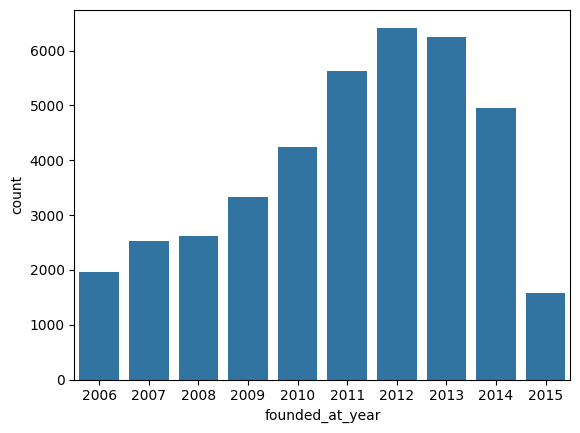

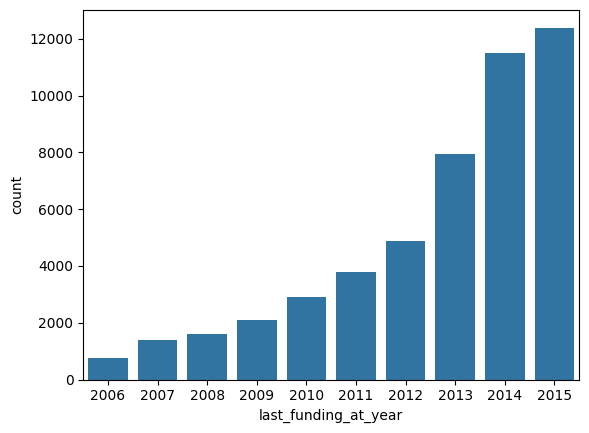

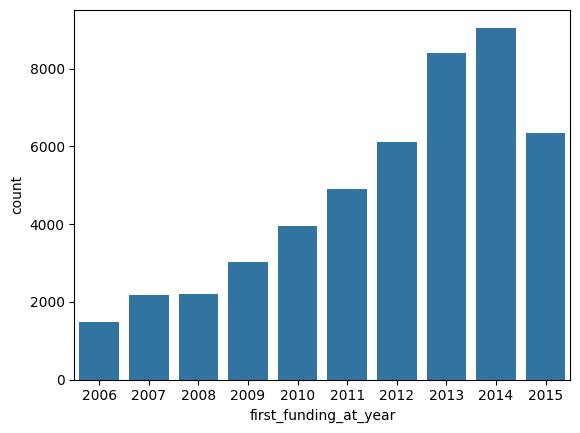

In [30]:
year_list = ['founded_at_year', 'last_funding_at_year', 'first_funding_at_year']
for i in year_list:
    sample=demo[i].value_counts().reset_index().sort_values(by='count',ascending=False).head(10)
    plt.figure()
    sns.barplot(x=i,y='count',data=sample)

These three graphs display the top 10 startups by founding year, first funding year, and last funding year. The data shows that the number of startups founded grew from 2006 to 2012, followed by a slight decline. In terms of funding, both the first and last funding years increased with each passing year. However, the number of first fundings began to decrease after 2014.

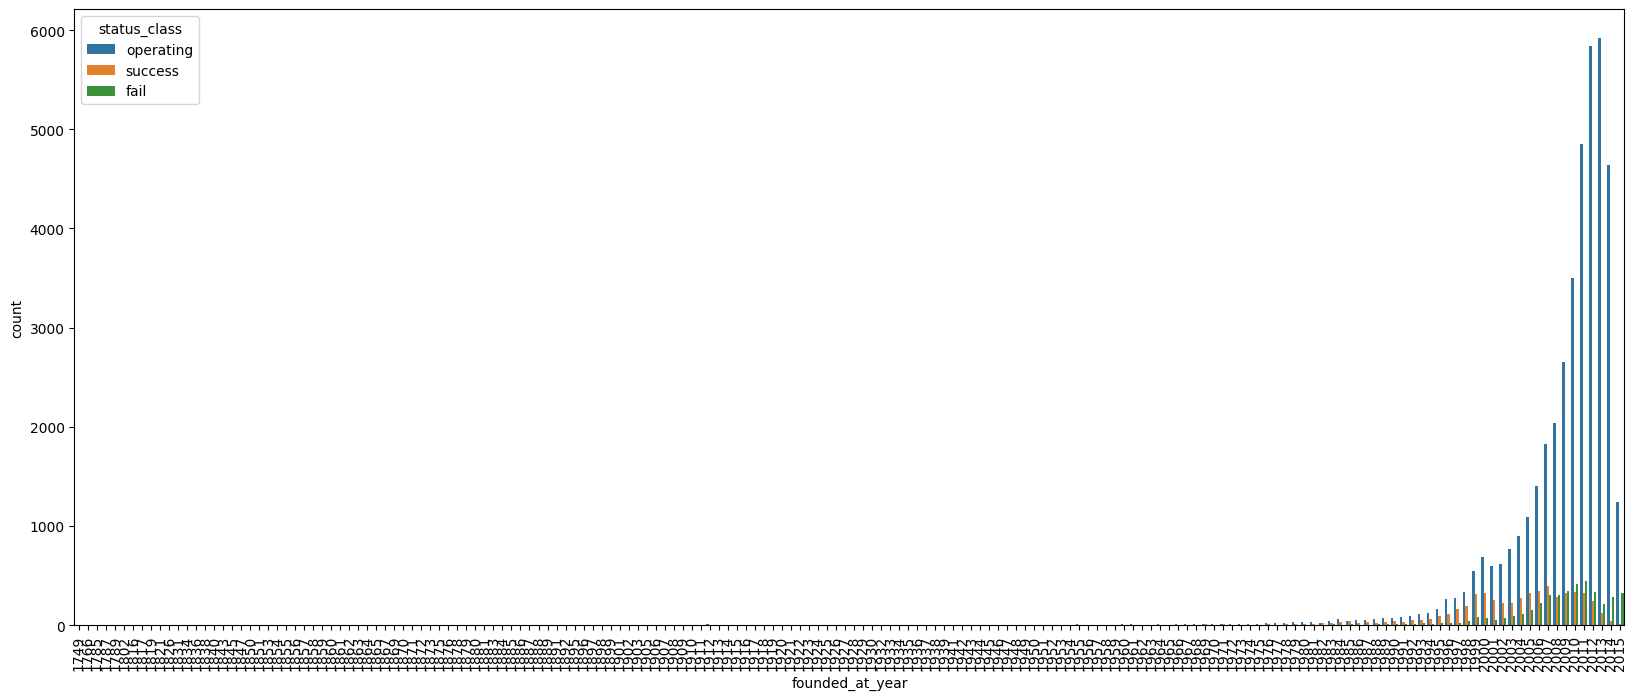

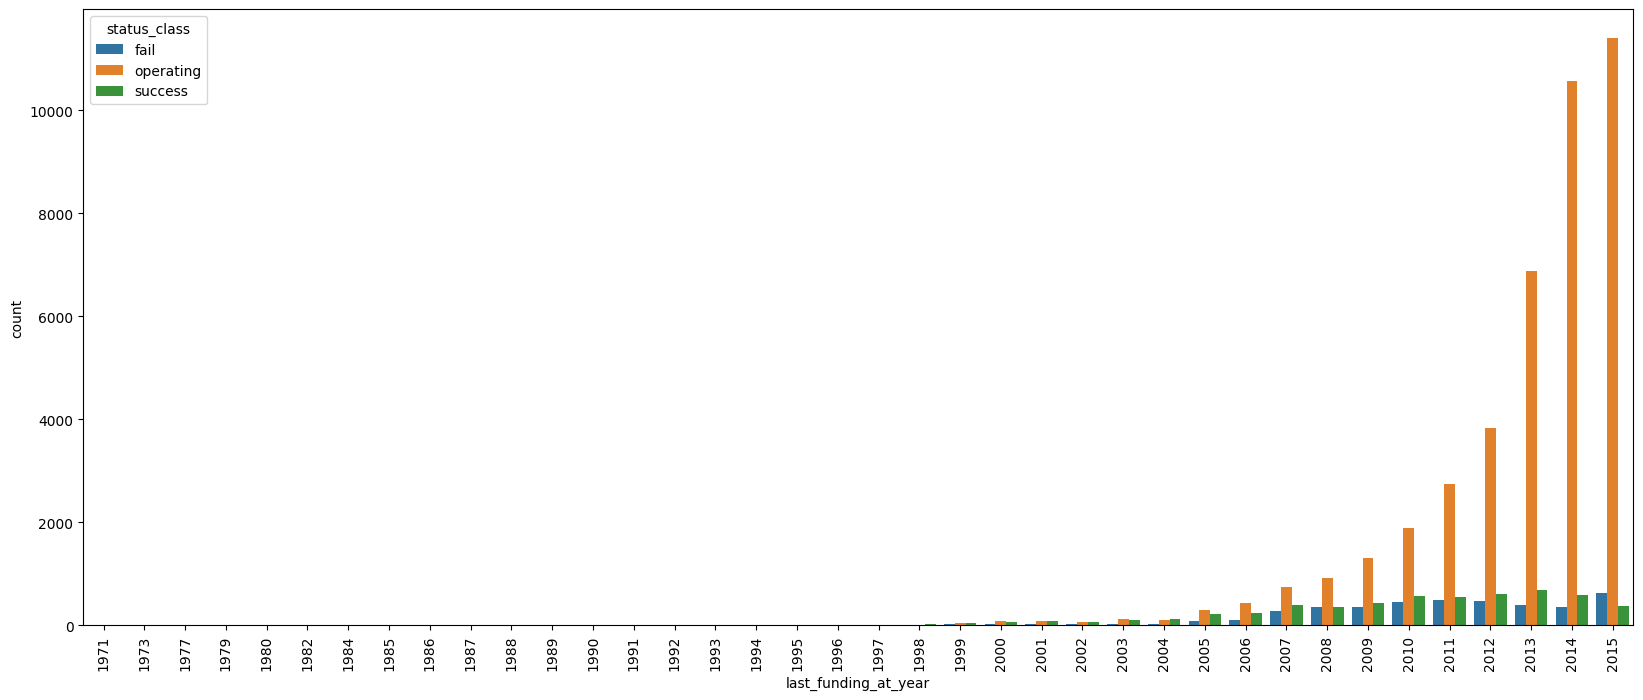

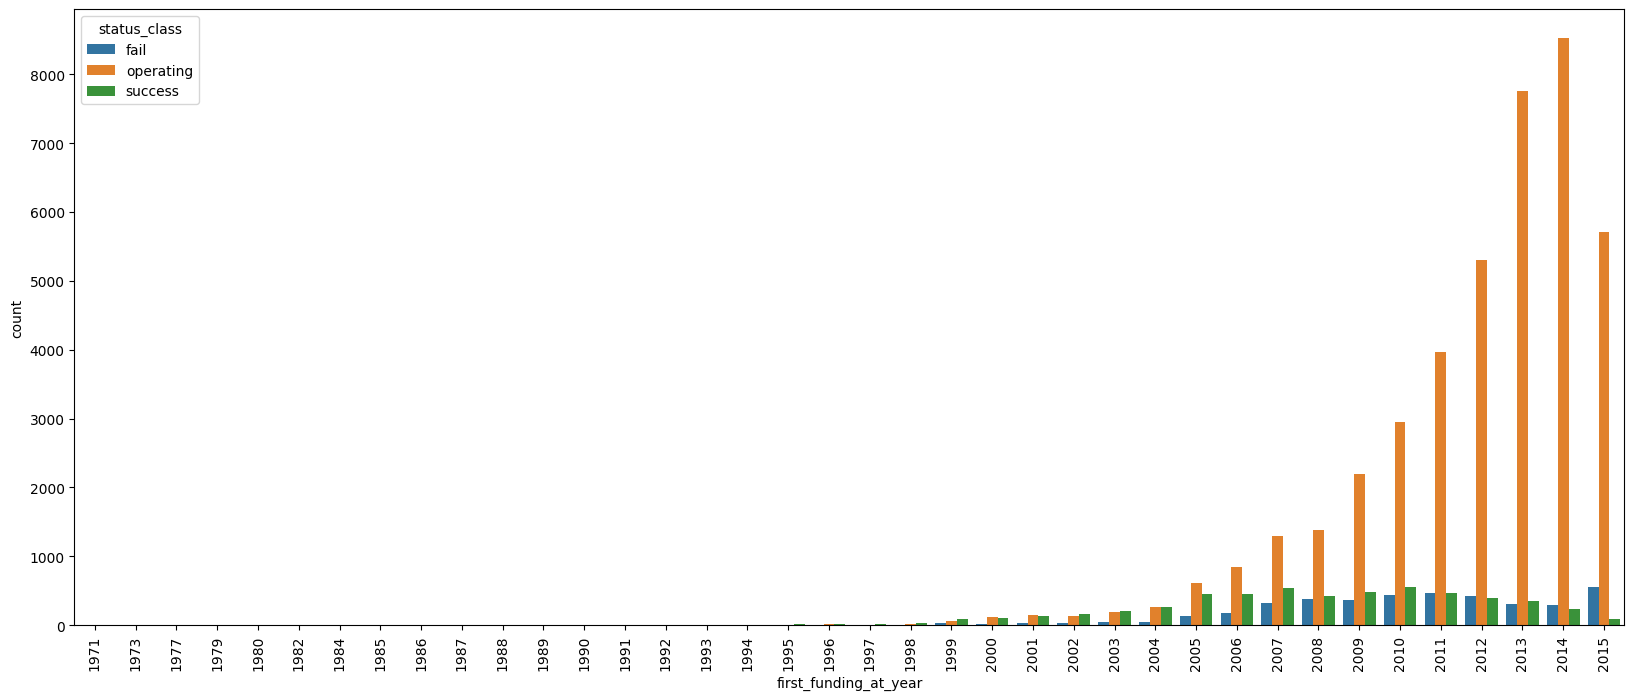

In [31]:
year_list = ['founded_at_year', 'last_funding_at_year', 'first_funding_at_year']
for i in year_list:
    top_founded_years=demo[i].value_counts().head(20).index
    data_top_20=demo[demo[i].isin(top_founded_years)]
    plt.figure(figsize=(20,8))
    sns.countplot(x=i,data=demo,hue='status_class')
    plt.xticks(rotation=90)



This graph provides insights into the same trends as the previous graphs but includes the status class of each startup. It shows how the distribution of startup statuses (e.g., operating, failed) varies across the founding year, first funding year, and last funding year.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Curated Web'),
  Text(1, 0, 'Software'),
  Text(2, 0, 'Biotechnology'),
  Text(3, 0, 'Mobile'),
  Text(4, 0, 'E-Commerce'),
  Text(5, 0, 'Health and Wellness'),
  Text(6, 0, 'Education'),
  Text(7, 0, 'Real Estate'),
  Text(8, 0, 'Manufacturing'),
  Text(9, 0, 'Games'),
  Text(10, 0, 'Social Media'),
  Text(11, 0, 'Clean Technology'),
  Text(12, 0, 'Enterprise Software'),
  Text(13, 0, 'Hardware + Software'),
  Text(14, 0, 'Health Care'),
  Text(15, 0, 'Semiconductors'),
  Text(16, 0, 'Security'),
  Text(17, 0, 'Consulting'),
  Text(18, 0, 'Finance'),
  Text(19, 0, 'Advertising')])

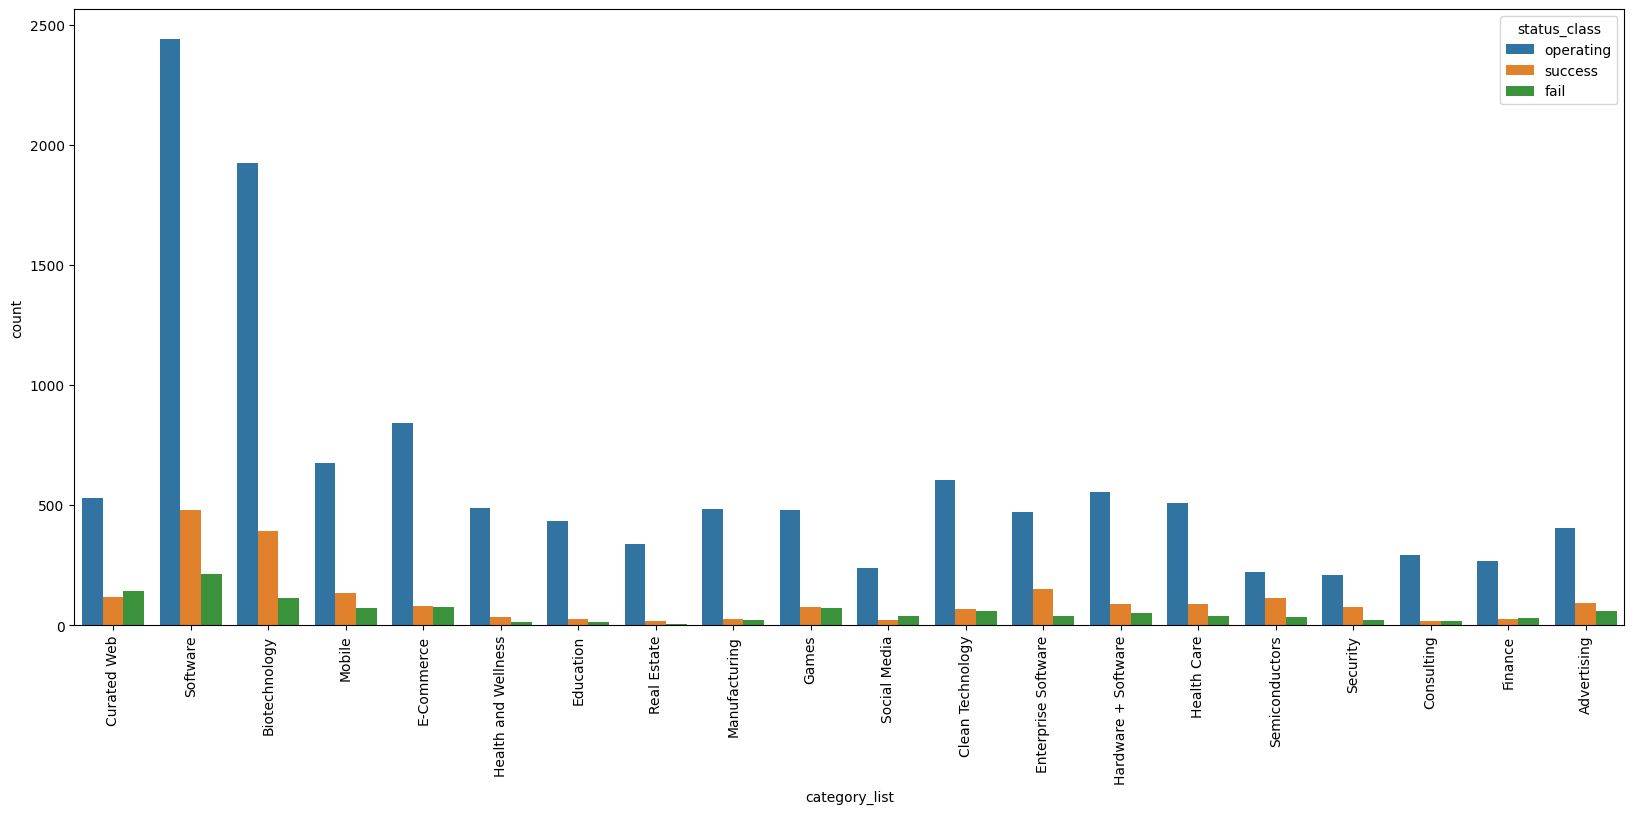

In [32]:
top_category=demo.category_list.value_counts().head(20).index
cat_20=demo[demo['category_list'].isin(top_category)]
plt.figure(figsize=(20,8))
sns.countplot(x='category_list',data=cat_20,hue='status_class')
plt.xticks(rotation=90)

The graph displays the top 20 startup categories, categorized by their status. It provides a breakdown of how each category's startups are distributed across different statuses, such as operating, failed, or other classifications.


In [33]:
demo.drop(['permalink', 'name',  'homepage_url'],axis=1,inplace=True)

/tmp/ipykernel_12669/3233116949.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demo.drop(['permalink', 'name',  'homepage_url'],axis=1,inplace=True)


In [34]:
demo

,category_list,funding_total_usd,country_code,state_code,region,city,funding_rounds,status_class,last_funding_at_year,last_funding_at_month,last_funding_at_day,first_funding_at_year,first_funding_at_month,first_funding_at_day,founded_at_year,founded_at_month,founded_at_day
1,Application Platforms|Real Time|Social Network...,7.000000e+05,USA,DE,DE - Other,Delaware City,2,operating,2014,10,14,2014,3,1,2014,9,4
3,Curated Web,2.000000e+06,CHN,22,Beijing,Beijing,1,operating,2008,3,19,2008,3,19,2007,1,1
4,Software,1.491948e+07,USA,IL,"Springfield, Illinois",Champaign,1,operating,2014,7,24,2014,7,24,2010,1,1
6,Biotechnology,7.628510e+05,CAN,BC,Vancouver,Vancouver,2,operating,2009,12,21,2009,9,11,1997,1,1
7,Analytics,3.360000e+07,USA,CA,SF Bay Area,Mountain View,4,operating,2015,11,9,2013,1,3,2011,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66361,Biotechnology,2.686600e+06,AUT,3,Vienna,Gerasdorf Bei Wien,1,operating,2013,1,29,2013,1,29,2007,1,1
66362,Analytics|Android|Developer APIs|Education|Gam...,1.120000e+06,GBR,H9,London,London,3,operating,2015,2,25,2014,3,24,2014,1,28
66364,Advertising|Mobile|Web Development|Wireless,1.143040e+05,HRV,15,Split,Split,4,operating,2014,3,1,2011,11,1,2012,5,13
66365,NaN,1.491948e+07,NaN,NaN,NaN,NaN,1,operating,2014,8,1,2014,8,1,2011,1,1


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12'),
  Text(12, 0, '13'),
  Text(13, 0, '14'),
  Text(14, 0, '15'),
  Text(15, 0, '16'),
  Text(16, 0, '17'),
  Text(17, 0, '18'),
  Text(18, 0, '19')])

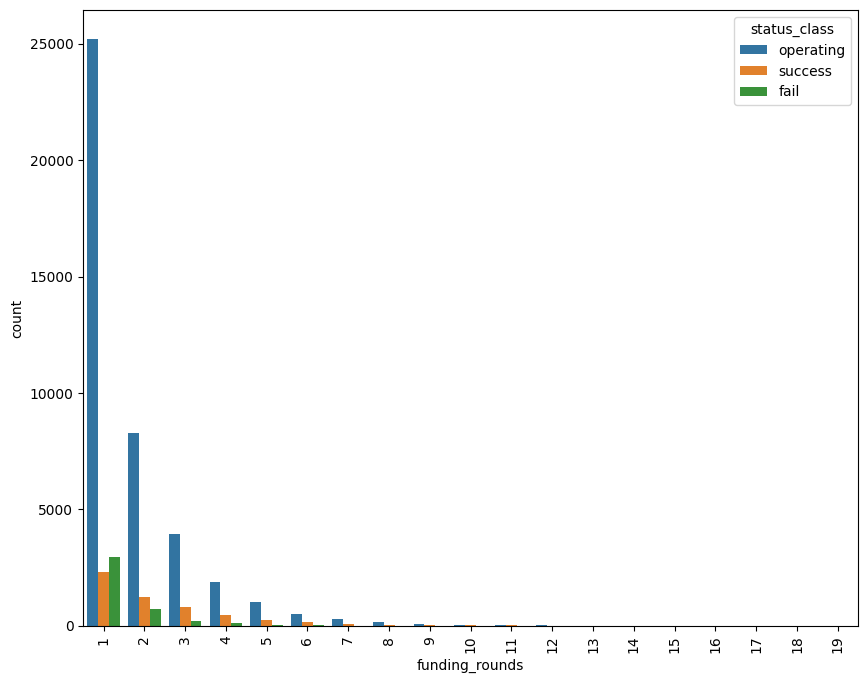

In [35]:
# filtered_round=demo.loc[demo.funding_rounds>4]
plt.figure(figsize=(10,8))
sns.countplot(x='funding_rounds',data=demo,hue='status_class')
plt.xticks(rotation=90)

/tmp/ipykernel_12669/1904632920.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='founded_at_year',y='founded_at_month',data=demo,hue='status_class',ci=None)


<Axes: xlabel='founded_at_year', ylabel='founded_at_month'>

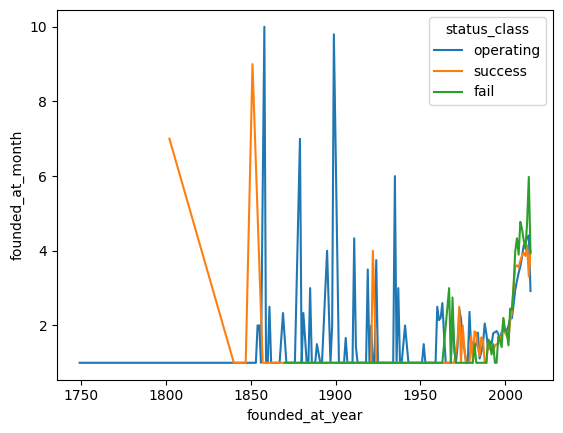

In [36]:
sns.lineplot(x='founded_at_year',y='founded_at_month',data=demo,hue='status_class',ci=None)

/tmp/ipykernel_12669/2891547600.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='founded_at_year',y='founded_at_month',data=filter_counts,hue='status_class',ci=None)


(array([1995. , 1997.5, 2000. , 2002.5, 2005. , 2007.5, 2010. , 2012.5,
        2015. , 2017.5]),
 [Text(1995.0, 0, '1995.0'),
  Text(1997.5, 0, '1997.5'),
  Text(2000.0, 0, '2000.0'),
  Text(2002.5, 0, '2002.5'),
  Text(2005.0, 0, '2005.0'),
  Text(2007.5, 0, '2007.5'),
  Text(2010.0, 0, '2010.0'),
  Text(2012.5, 0, '2012.5'),
  Text(2015.0, 0, '2015.0'),
  Text(2017.5, 0, '2017.5')])

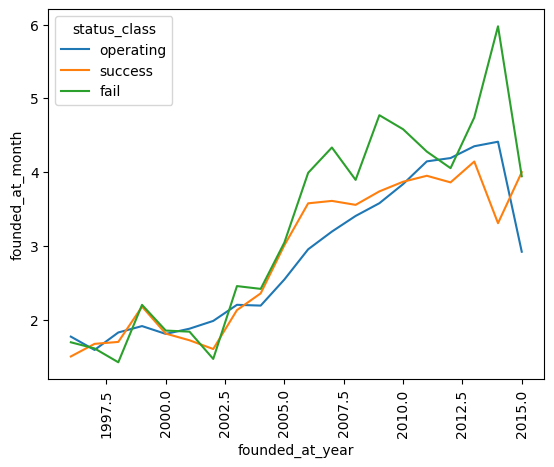

In [37]:
counts=demo.founded_at_year.value_counts().head(20).index
filter_counts=demo[demo['founded_at_year'].isin(counts)]
sns.lineplot(x='founded_at_year',y='founded_at_month',data=filter_counts,hue='status_class',ci=None)
plt.xticks(rotation=90)

In [38]:
from datetime import datetime

current_year = datetime.now().year

# Calculate the new features
demo['age_of_company'] = current_year - demo['founded_at_year']
demo['years_since_last_funding'] = current_year - demo['last_funding_at_year']
demo['years_since_first_funding'] = current_year - demo['first_funding_at_year']
demo.drop(columns=['founded_at_year', 'last_funding_at_year', 'first_funding_at_year', 
                 'founded_at_month', 'founded_at_day', 'last_funding_at_month', 
                 'last_funding_at_day', 'first_funding_at_month', 'first_funding_at_day'], inplace=True)


/tmp/ipykernel_12669/43117157.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demo['age_of_company'] = current_year - demo['founded_at_year']
/tmp/ipykernel_12669/43117157.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demo['years_since_last_funding'] = current_year - demo['last_funding_at_year']
/tmp/ipykernel_12669/43117157.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [39]:
demo

,category_list,funding_total_usd,country_code,state_code,region,city,funding_rounds,status_class,age_of_company,years_since_last_funding,years_since_first_funding
1,Application Platforms|Real Time|Social Network...,7.000000e+05,USA,DE,DE - Other,Delaware City,2,operating,10,10,10
3,Curated Web,2.000000e+06,CHN,22,Beijing,Beijing,1,operating,17,16,16
4,Software,1.491948e+07,USA,IL,"Springfield, Illinois",Champaign,1,operating,14,10,10
6,Biotechnology,7.628510e+05,CAN,BC,Vancouver,Vancouver,2,operating,27,15,15
7,Analytics,3.360000e+07,USA,CA,SF Bay Area,Mountain View,4,operating,13,9,11
...,...,...,...,...,...,...,...,...,...,...,...
66361,Biotechnology,2.686600e+06,AUT,3,Vienna,Gerasdorf Bei Wien,1,operating,17,11,11
66362,Analytics|Android|Developer APIs|Education|Gam...,1.120000e+06,GBR,H9,London,London,3,operating,10,9,10
66364,Advertising|Mobile|Web Development|Wireless,1.143040e+05,HRV,15,Split,Split,4,operating,12,10,13
66365,NaN,1.491948e+07,NaN,NaN,NaN,NaN,1,operating,13,10,10


In [40]:
category_counts = demo['category_list'].value_counts()
threshold = 1
frequent_categories = category_counts[category_counts > threshold].index
demo['category_list'] = demo['category_list'].apply(lambda x: x if x in frequent_categories else 'other')

/tmp/ipykernel_12669/761028720.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demo['category_list'] = demo['category_list'].apply(lambda x: x if x in frequent_categories else 'other')


In [41]:
city_counts = demo['city'].value_counts()
threshold = 1
frequent_categories = city_counts[city_counts > threshold].index
demo['city'] = df['city'].apply(lambda x: x if x in frequent_categories else 'other')

/tmp/ipykernel_12669/4121335435.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demo['city'] = df['city'].apply(lambda x: x if x in frequent_categories else 'other')


In [42]:
for i in demo.columns:
    if demo[i].isna().sum()>0:
        demo[i]=demo[i].fillna(demo[i].mode()[0])

/tmp/ipykernel_12669/4264030717.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demo[i]=demo[i].fillna(demo[i].mode()[0])


In [43]:
demo.isna().sum()

category_list                0
funding_total_usd            0
country_code                 0
state_code                   0
region                       0
city                         0
funding_rounds               0
status_class                 0
age_of_company               0
years_since_last_funding     0
years_since_first_funding    0
dtype: int64

In [44]:
demo.dtypes

category_list                 object
funding_total_usd            float64
country_code                  object
state_code                    object
region                        object
city                          object
funding_rounds                 int64
status_class                  object
age_of_company                 Int64
years_since_last_funding       Int64
years_since_first_funding      Int64
dtype: object

In [45]:
data=demo.loc[(demo['status_class']=='success') | (demo['status_class']=='fail')]
data

,category_list,funding_total_usd,country_code,state_code,region,city,funding_rounds,status_class,age_of_company,years_since_last_funding,years_since_first_funding
15,other,5000000.0,USA,CA,SF Bay Area,Cupertino,1,success,12,9,9
20,Art|E-Commerce|Marketplaces,500000.0,USA,WA,Seattle,Seattle,1,success,15,15,15
23,Curated Web,2535000.0,USA,CA,SF Bay Area,San Francisco,2,success,14,13,14
31,Analytics,1250000.0,USA,CA,SF Bay Area,San Francisco,2,success,13,13,13
32,Software,35000000.0,USA,NY,New York City,New York,1,success,24,14,14
...,...,...,...,...,...,...,...,...,...,...,...
66343,Biotechnology,2257464.0,USA,MD,"Washington, D.C.",College Park,3,fail,18,14,17
66349,other,3805520.0,ESP,56,Barcelona,Barcelona,2,success,15,12,13
66350,Pharmaceuticals,13000000.0,USA,PA,Philadelphia,Radnor,1,success,10,10,10
66352,other,866550786.0,USA,CA,SF Bay Area,San Francisco,9,success,17,13,17


we use sucess and fail prediction to train and model creating

In [46]:
data.dtypes

category_list                 object
funding_total_usd            float64
country_code                  object
state_code                    object
region                        object
city                          object
funding_rounds                 int64
status_class                  object
age_of_company                 Int64
years_since_last_funding       Int64
years_since_first_funding      Int64
dtype: object

<Axes: xlabel='age_of_company', ylabel='years_since_first_funding'>

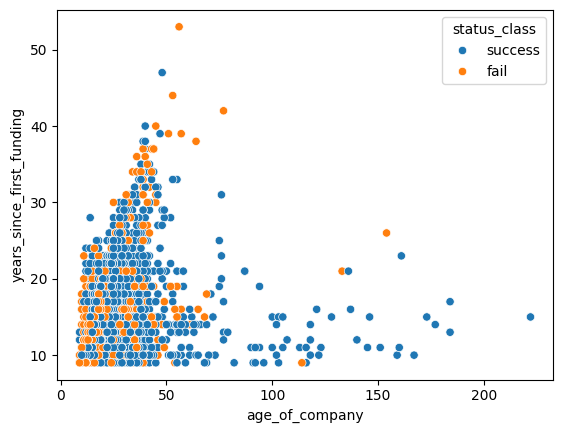

In [47]:
sns.scatterplot(x='age_of_company',y='years_since_first_funding',data=data,hue='status_class')

<Axes: xlabel='years_since_last_funding', ylabel='years_since_first_funding'>

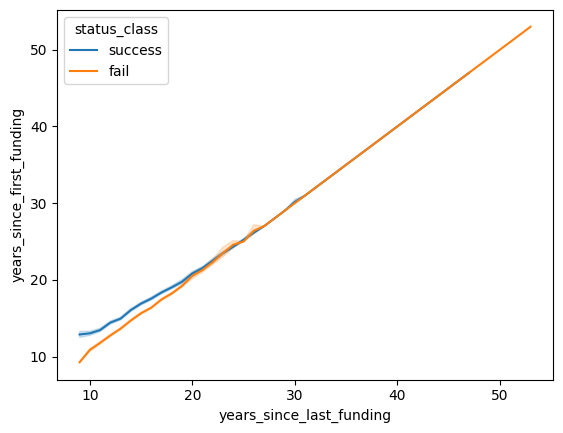

In [48]:
sns.lineplot(x='years_since_last_funding',y='years_since_first_funding',data=data,hue='status_class')

<Axes: xlabel='funding_rounds', ylabel='age_of_company'>

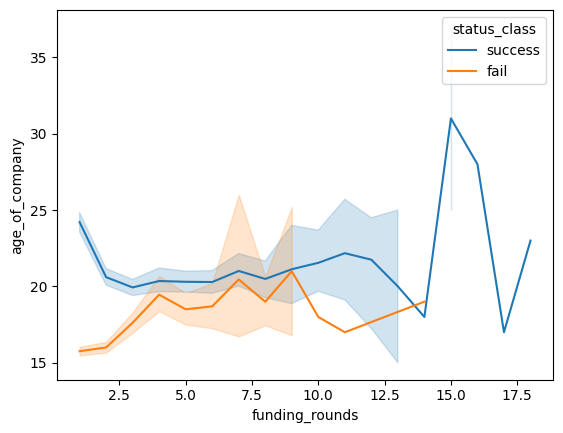

In [49]:
sns.lineplot(x='funding_rounds',y='age_of_company',data=data,hue='status_class')


In [50]:
data.category_list.value_counts().head

<bound method NDFrame.head of category_list
other                                          4162
Software                                        692
Biotechnology                                   506
Curated Web                                     264
Mobile                                          207
                                               ... 
Startups|Travel                                   1
Fitness|Health and Wellness                       1
File Sharing|Mobile                               1
Communications Hardware|Security|Technology       1
Search|Startups|Travel                            1
Name: count, Length: 944, dtype: int64>

In [51]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

#Apply LabelEncoder to each categorical feature
data['country_code'] = encoder.fit_transform(data['country_code'])
data['state_code'] = encoder.fit_transform(data['state_code'])
data['region'] = encoder.fit_transform(data['region'])
data['category_list'] = encoder.fit_transform(data['category_list'])
data['city'] = encoder.fit_transform(data['city'])




/tmp/ipykernel_12669/4253018549.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['country_code'] = encoder.fit_transform(data['country_code'])
/tmp/ipykernel_12669/4253018549.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['state_code'] = encoder.fit_transform(data['state_code'])
/tmp/ipykernel_12669/4253018549.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

use label encoder to encode the categorical columns

In [52]:
data

,category_list,funding_total_usd,country_code,state_code,region,city,funding_rounds,status_class,age_of_company,years_since_last_funding,years_since_first_funding
15,943,5000000.0,76,81,411,247,1,success,12,9,9
20,133,500000.0,76,187,431,933,1,success,15,15,15
23,315,2535000.0,76,81,411,901,2,success,14,13,14
31,63,1250000.0,76,81,411,901,2,success,13,13,13
32,900,35000000.0,76,156,339,707,1,success,24,14,14
...,...,...,...,...,...,...,...,...,...,...,...
66343,160,2257464.0,76,137,505,228,3,fail,18,14,17
66349,943,3805520.0,20,40,37,65,2,success,15,12,13
66350,830,13000000.0,76,166,376,833,1,success,10,10,10
66352,943,866550786.0,76,81,411,901,9,success,17,13,17


In [53]:
x=data.drop(['status_class'],axis=1).values
y=data.status_class.values

In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)

(6716, 10)
(2879, 10)
(6716,)


In [55]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report
rf=RandomForestClassifier()
dt=DecisionTreeClassifier()
be=BernoulliNB()
s=SVC()
knn=KNeighborsClassifier()
objects=[knn, be, s, dt, rf]
for i in objects:
  i.fit(x_train,y_train)
  result=i.predict(x_test)
  print('result is :',i, result)
  print('accuracy score of ',i, accuracy_score(result, y_test))
  print('classification report "\n"', classification_report(result, y_test))
  print('*'*100)

result is : KNeighborsClassifier() ['success' 'success' 'fail' ... 'success' 'success' 'fail']
accuracy score of  KNeighborsClassifier() 0.7085793678360541
classification report "
"               precision    recall  f1-score   support

        fail       0.63      0.65      0.64      1154
     success       0.76      0.75      0.75      1725

    accuracy                           0.71      2879
   macro avg       0.70      0.70      0.70      2879
weighted avg       0.71      0.71      0.71      2879

****************************************************************************************************
result is : BernoulliNB() ['fail' 'success' 'success' ... 'success' 'fail' 'success']
accuracy score of  BernoulliNB() 0.703369225425495
classification report "
"               precision    recall  f1-score   support

        fail       0.70      0.62      0.66      1339
     success       0.70      0.77      0.74      1540

    accuracy                           0.70      2879
   macro 

In [57]:
r1=RandomForestClassifier()
r1.fit(x_train,y_train)
res=r1.predict(x_test)
accuracy_score(y_test,res)

0.7537339353942341

In [58]:
test=demo.loc[demo['status_class']=='operating']
test

,category_list,funding_total_usd,country_code,state_code,region,city,funding_rounds,status_class,age_of_company,years_since_last_funding,years_since_first_funding
1,other,7.000000e+05,USA,DE,DE - Other,Delaware City,2,operating,10,10,10
3,Curated Web,2.000000e+06,CHN,22,Beijing,Beijing,1,operating,17,16,16
4,Software,1.491948e+07,USA,IL,"Springfield, Illinois",Champaign,1,operating,14,10,10
6,Biotechnology,7.628510e+05,CAN,BC,Vancouver,Vancouver,2,operating,27,15,15
7,Analytics,3.360000e+07,USA,CA,SF Bay Area,Mountain View,4,operating,13,9,11
...,...,...,...,...,...,...,...,...,...,...,...
66361,Biotechnology,2.686600e+06,AUT,3,Vienna,other,1,operating,17,11,11
66362,other,1.120000e+06,GBR,H9,London,London,3,operating,10,9,10
66364,other,1.143040e+05,HRV,15,Split,Split,4,operating,12,10,13
66365,other,1.491948e+07,USA,CA,SF Bay Area,other,1,operating,13,10,10


In [59]:
test=test.drop(['status_class'],axis=1)
test
test_value=z=test.copy()

In [60]:
import pickle
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

label_encoders = {}

for column in ['country_code', 'state_code', 'region', 'category_list', 'city']:
    label_encoder = LabelEncoder()
    test[column] = label_encoder.fit_transform(test[column])
    label_encoders[column] = label_encoder  

# pickle.dump(label_encoders, open('sample_encoders.pkl', 'wb'))


In [61]:
test

,category_list,funding_total_usd,country_code,state_code,region,city,funding_rounds,age_of_company,years_since_last_funding,years_since_first_funding
1,1934,7.000000e+05,118,121,224,495,2,10,10,10
3,646,2.000000e+06,20,14,78,144,1,17,16,16
4,1847,1.491948e+07,118,163,831,338,1,14,10,10
6,325,7.628510e+05,17,103,934,1940,2,27,15,15
7,117,3.360000e+07,118,111,764,1247,4,13,9,11
...,...,...,...,...,...,...,...,...,...,...
66361,325,2.686600e+06,5,22,941,2096,1,17,11,11
66362,1934,1.120000e+06,38,153,522,1061,3,10,9,10
66364,1934,1.143040e+05,48,6,828,1764,4,12,10,13
66365,1934,1.491948e+07,118,111,764,2096,1,13,10,10


In [62]:
z=scaler.transform(test)            

/home/athul/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [63]:
a1=r1.predict(z)
a1

array(['fail', 'fail', 'success', ..., 'fail', 'fail', 'fail'],
      dtype=object)

In [65]:
test['pred']=a1
test

,category_list,funding_total_usd,country_code,state_code,region,city,funding_rounds,age_of_company,years_since_last_funding,years_since_first_funding,pred
1,1934,7.000000e+05,118,121,224,495,2,10,10,10,fail
3,646,2.000000e+06,20,14,78,144,1,17,16,16,fail
4,1847,1.491948e+07,118,163,831,338,1,14,10,10,success
6,325,7.628510e+05,17,103,934,1940,2,27,15,15,success
7,117,3.360000e+07,118,111,764,1247,4,13,9,11,success
...,...,...,...,...,...,...,...,...,...,...,...
66361,325,2.686600e+06,5,22,941,2096,1,17,11,11,success
66362,1934,1.120000e+06,38,153,522,1061,3,10,9,10,fail
66364,1934,1.143040e+05,48,6,828,1764,4,12,10,13,fail
66365,1934,1.491948e+07,118,111,764,2096,1,13,10,10,fail


In [66]:
test.pred.value_counts()

pred
fail       27471
success    14044
Name: count, dtype: int64

##### Hyperparameter tunnig

In [67]:


from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

param_dist = {
    'n_estimators': randint(10, 200),  
    'max_features': ['auto', 'sqrt', 'log2'],  
    'max_depth': [None, randint(1, 20)], 
    'min_samples_split': randint(2, 20),  
    'min_samples_leaf': randint(1, 20),  
    'bootstrap': [True, False]  
}
rf = RandomForestClassifier()

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=100,  
    cv=5,  
    verbose=1,  
    random_state=42,  
    n_jobs=-1  
)
random_search.fit(x_train, y_train)



Fitting 5 folds for each of 100 candidates, totalling 500 fits


/home/athul/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
360 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/home/athul/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/athul/.local/lib/python3.8/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/home/athul/.local/lib/python3.8/site-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/home/athul/.local/lib/pyt

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None,
                                                      <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fb865a4a220>],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fb864ca8e50>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fb8c67a9400>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fb865ab5ca0>},
                   random_state=42, verbose=1)

In [68]:
best_params = random_search.best_params_
best_model = random_search.best_estimator_

print("Best parameters found: ", best_params)


Best parameters found:  {'bootstrap': True, 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 12, 'min_samples_split': 17, 'n_estimators': 188}


select the best parameter 

In [ ]:
This will show the 

In [69]:
from sklearn.metrics import accuracy_score

y_pred = best_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the best model: ", accuracy)


Accuracy of the best model:  0.7665856200069469


In [70]:
a=pd.DataFrame(res)
a[0].value_counts()

0
success    1823
fail       1056
Name: count, dtype: int64

In [71]:
random_res=best_model.predict(z)
random_res

array(['fail', 'fail', 'success', ..., 'fail', 'fail', 'fail'],
      dtype=object)

In [72]:
test['randomsearchcv_prediction']=random_res
test

,category_list,funding_total_usd,country_code,state_code,region,city,funding_rounds,age_of_company,years_since_last_funding,years_since_first_funding,pred,randomsearchcv_prediction
1,1934,7.000000e+05,118,121,224,495,2,10,10,10,fail,fail
3,646,2.000000e+06,20,14,78,144,1,17,16,16,fail,fail
4,1847,1.491948e+07,118,163,831,338,1,14,10,10,success,success
6,325,7.628510e+05,17,103,934,1940,2,27,15,15,success,fail
7,117,3.360000e+07,118,111,764,1247,4,13,9,11,success,success
...,...,...,...,...,...,...,...,...,...,...,...,...
66361,325,2.686600e+06,5,22,941,2096,1,17,11,11,success,fail
66362,1934,1.120000e+06,38,153,522,1061,3,10,9,10,fail,fail
66364,1934,1.143040e+05,48,6,828,1764,4,12,10,13,fail,fail
66365,1934,1.491948e+07,118,111,764,2096,1,13,10,10,fail,fail


This table show the comparision with random model and after using randomsearchcv(hyperparameter tunniing)

In [ ]:
# import pickle
# pickle.dump(test_value,open('test_values.pkl','wb'))
# pickle.dump(scaler,open('scaler.pkl','wb'))
# pickle.dump(best_model,open('randomforest_without.pkl','wb'))